# Introduction

Subscription Products are the main source of revenue for companies across all industries. 

These products can come in the form of a 'one size fits all' overcompassing subscription, or in mutli-level memberships.

Regardless of how they structure their memberships, or what industry they are in, companies almost always try to minmize customer churn (a.k.a subscription cancellations). 

To retain their customers, these companies first need to identify behavioral patterns that act as catalyst in disengagement with the product.

- Market: The target audience is the entirety of a company's subscription base. They are the one the company wants to keep.

- Product: The subscription products that customers are already enrolled in can provide value that users may not have imagined, or that they may have forgotten.

- Goal: The objective of this model is to predict which users are likely to churn, so that the company can focus on re-engaging these users with the product. These efforts can be email reminders about the benefits of the product, especially focusing on features that are new or that the user has shown to value.

# Business Challenge

- This is a case study of a fintech company that provides a subscription product to its users, which allows them to manage thier bank accounts(saving accounts, credit cards, etc), provides them with personalised coupons, informs theem of the latest low-APR loans available in the market and educates them on the best available methods to save money (like videos on saving money on taxes, free courses on financial health, etc)

- We are in charge of identifying users who are likely to cancel their subscription so that we can start building new features that they may be interested in. These features can increase the engagement and interest of our users towards the product.

# Data

By subscribing to the membership, our customers have provided us with data on their finances, as well as how they handle those finaces through the product. We also have some demographic information we acquired from them during the sign-up process.

Furthermore, product-related data is more indicative of what new features we should be creating as a company.

<b>Description of each Columns</b>

userid - User identifier column

churn  - tells us whether or not the user has left

age - age of the customer

housing - tells us whether or not the user has a house. na - data not available, R - rented house, O - Owned House

state- state where the customer lives

credit_score - Customer's credit score

deposits - How many times the user has deposited money

Withdrawal - how many times the users has withdrawn money

purchases - how many purchases done outside partner stores

cc_taken - credit card used

cc_recommended - no of times the person has seen the screen to use a credit card

cc_disliked - whether or not customer clicked cc dislike button

cc_liked - whether or not customer clicked cc like button

cc_application_begin - whether or not a person has begun application for a credit card

app_dowmloaded - 

web_user - 

app_user - 

app_web_user - both app and web user

ios_user - 

android_user - 

registered_phones - no of registered phones

payment_type - frequency user gets paid

waiting_4_loan - user is waiting for loan to be approved

cancelled_laon 

received _ loan

rejected_loan

zodiac_sign

left_for_two_month_plus - left us for two months or more

left_for one month - 

rewards_earned - how many points user has earned based on their actions

is_referred - user referred by somebody else

In [1]:
# Importing Libraries 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
dataset = pd.read_csv('C:/Users/Tobi/Desktop/data set/churn_data.csv')

In [3]:
# EDA

dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
dataset.keys()

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [5]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


### Cleaning data

In [6]:
# Removing NaN

dataset.isnull().sum().sort_values(ascending = False)

credit_score               8031
rewards_earned             3227
age                           4
is_referred                   0
app_downloaded                0
churn                         0
housing                       0
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
web_user                      0
reward_rate                   0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
user                          0
dtype: i

In [7]:
# Age

dataset = dataset[pd.notnull(dataset['age'])] # returning only the rows without the age null 

In [8]:
# dropping credit score and rewards earned 

dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

In [9]:
dataset.isnull().sum()

user                       0
churn                      0
age                        0
housing                    0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
reward_rate                0
is_referred                0
dtype: int64

## Histogram

In [10]:
dataset.dtypes

user                         int64
churn                        int64
age                        float64
housing                     object
deposits                     int64
withdrawal                   int64
purchases_partners           int64
purchases                    int64
cc_taken                     int64
cc_recommended               int64
cc_disliked                  int64
cc_liked                     int64
cc_application_begin         int64
app_downloaded               int64
web_user                     int64
app_web_user                 int64
ios_user                     int64
android_user                 int64
registered_phones            int64
payment_type                object
waiting_4_loan               int64
cancelled_loan               int64
received_loan                int64
rejected_loan                int64
zodiac_sign                 object
left_for_two_month_plus      int64
left_for_one_month           int64
reward_rate                float64
is_referred         

In [11]:
dataset2 = dataset.drop(columns = ['user', 'churn'])

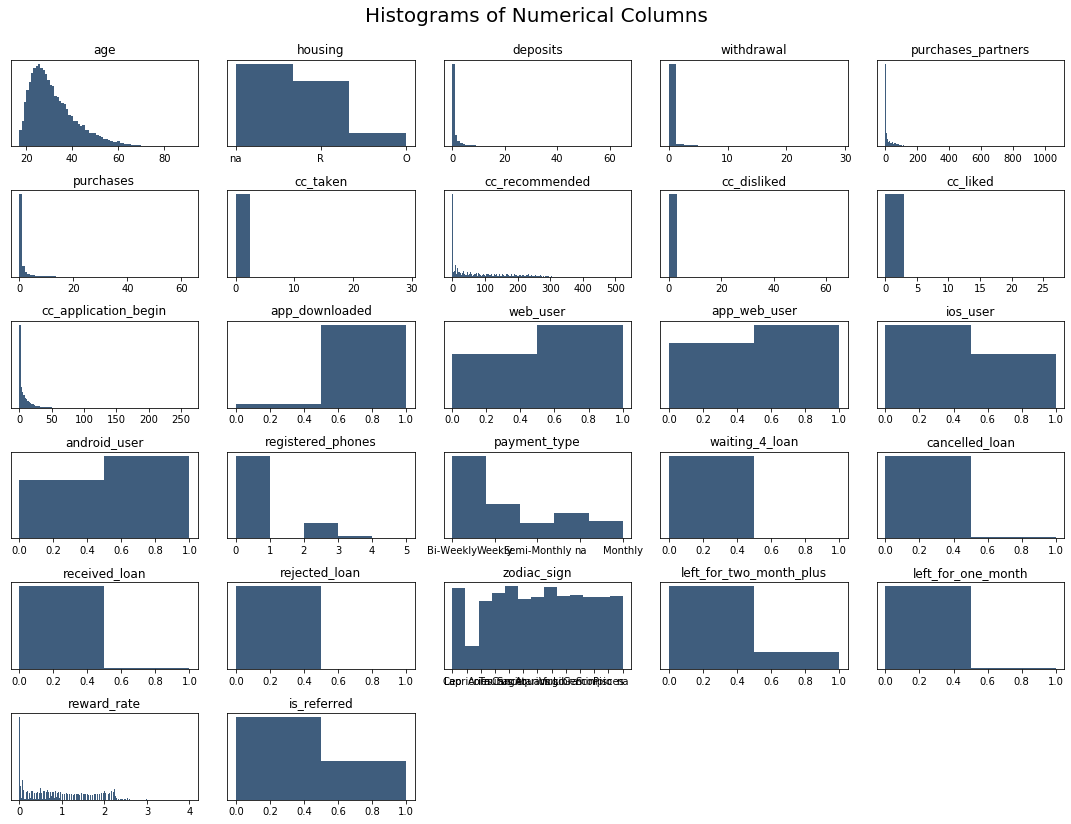

In [12]:
fig = plt.figure(figsize = (15,12))
plt.suptitle('Histograms of Numerical Columns', fontsize = 20)

for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
    
    vals = np.size(dataset2.iloc[:, i - 1]. unique())
    
    plt.hist(dataset2.iloc[:, i -1], bins = vals, color = '#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [13]:
dataset.shape

(26996, 29)

## Pie Chart

for binary columns

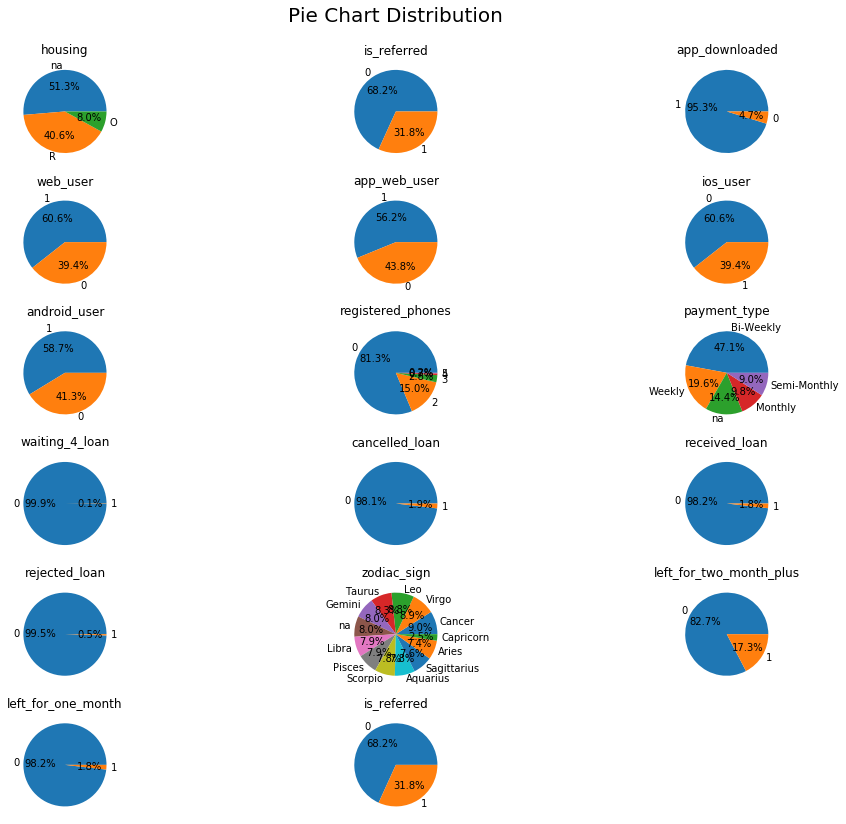

In [14]:
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded', 'web_user', 'app_web_user', 'ios_user', 'android_user',
                   'registered_phones', 'payment_type', 'waiting_4_loan', 'cancelled_loan',
                   'received_loan', 'rejected_loan', 'zodiac_sign', 'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

fig = plt.figure(figsize = (15,12))
plt.suptitle('Pie Chart Distribution', fontsize = 20)

for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    
    plt.pie(values, labels = index, autopct = '%1.1f%%')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [15]:
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [16]:
dataset[dataset2.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [17]:
dataset[dataset2.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [18]:
dataset[dataset2.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

### Correlation Plot

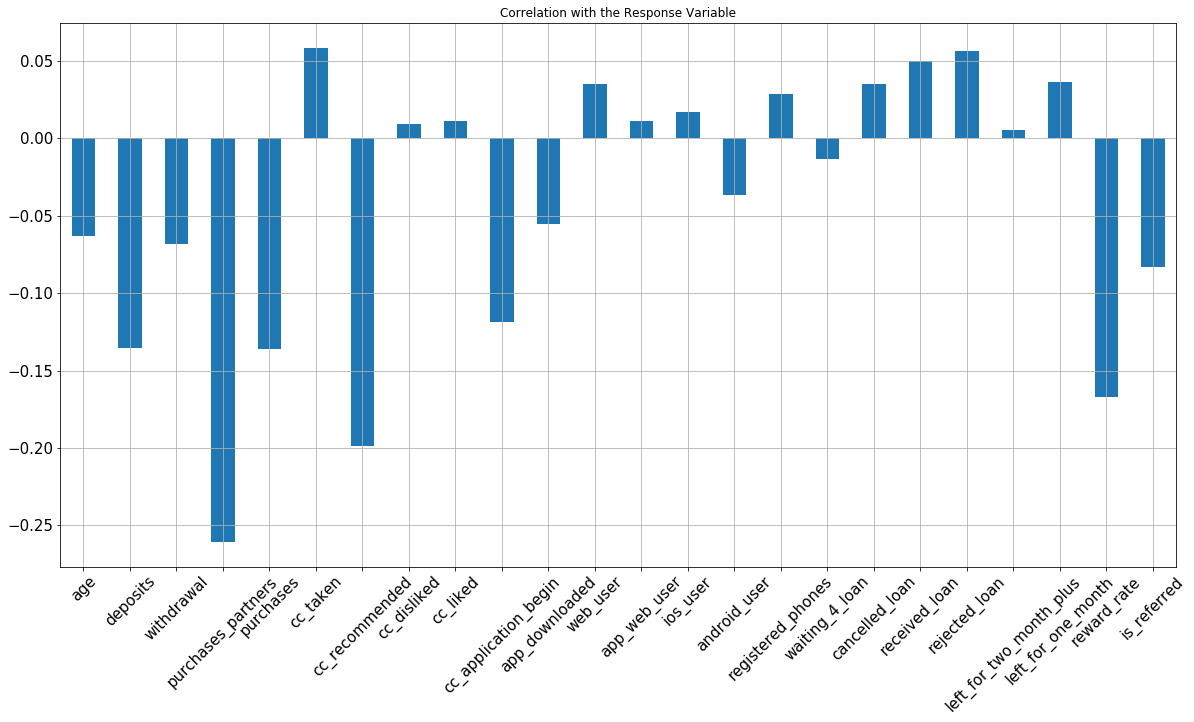

In [19]:
### Exploring uneven Features

dataset.drop(columns = ['churn', 'user', 'housing', 'payment_type', 
                        'zodiac_sign']).corrwith(dataset.churn).plot.bar(
figsize = (20, 10), title = 'Correlation with the Response Variable', fontsize = 15, rot = 45, grid = True)

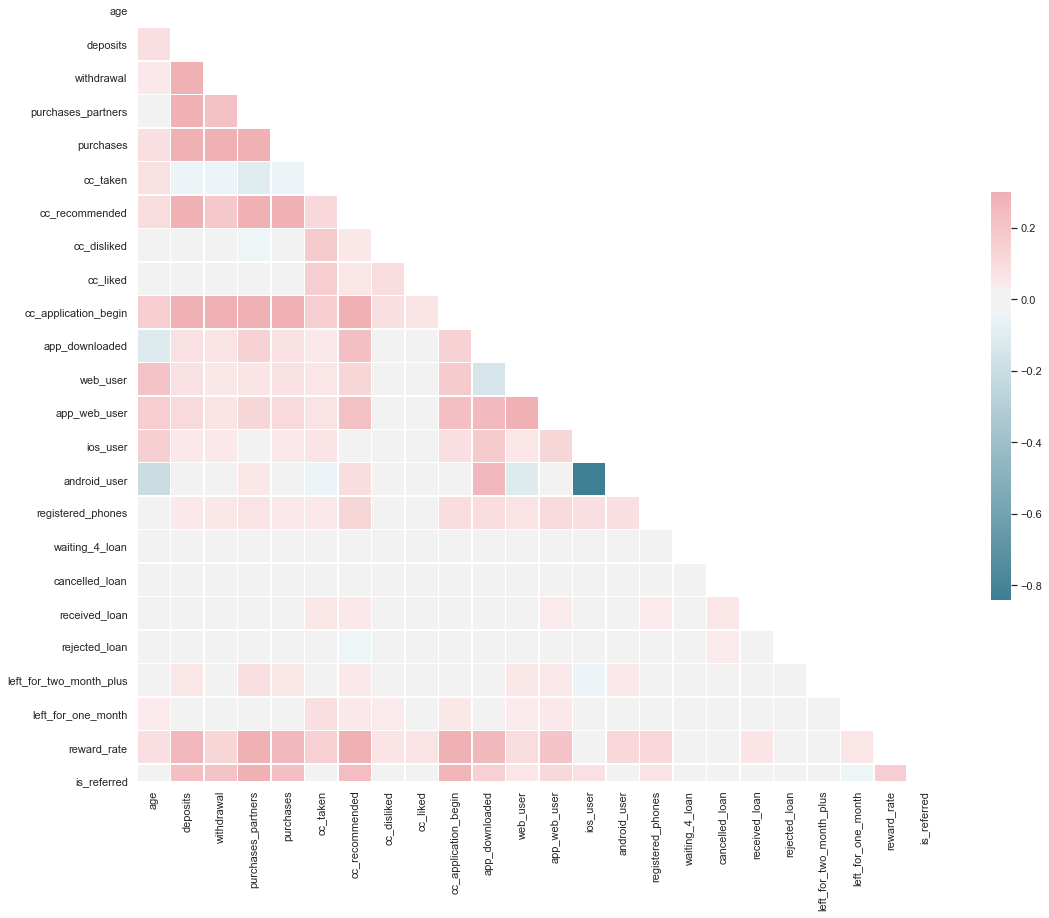

In [20]:
# Correlation Matrix

sn.set(style = 'white')

# Compute the correlation matrix
corr = dataset.drop(columns = ['user', 'churn']).corr()

# Generate a mask for the upper traingle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (18,15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap = True)

# Draw the heatmap with the mask and correct aspect ratio

sn.heatmap(corr, mask = mask, cmap=cmap, vmax = .3, center = 0, square = True, linewidths = .5, cbar_kws = {'shrink':.5})

The column 'app_web_user' is a function of the two columns 'app downloaded' and 'web_user'. So we will remove it because it is not independent.

In [21]:
dataset = dataset.drop(columns = ['app_web_user'])

## Data Preparation

In [22]:
user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])

# One-hot Encoding

dataset.housing.value_counts()
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [23]:
# We will drop a couple of correlated columns to avoid the dummy variable trap

dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

## Splitting the dataset into Training set and Test set

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'),
                                                   dataset['churn'],
                                                   test_size = 0.2,
                                                   random_state = 0)

In [25]:
# Balancing the Training Set

y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [26]:
import random
pos_index = y_train[y_train.values ==1].index
neg_index = y_train[y_train.values ==0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
    
else:
    lower = pos_index
    higher = neg_index
    
random.seed(0)
higher = np.random.choice(higher, size = len(lower))
lower = np.asarray(lower)

new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

## Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test.columns = X_test.columns.values

X_train2.index = X_train.index.values
X_test.index = X_test.index.values

X_train = X_train2
X_test = X_test2

## Model Building

### Fitting Model to the Training Set

In [28]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train, y_train)

c:\users\tobi\pycharmprojects\data_visualization\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# Predicting Test Set

y_pred = classifier.predict(X_test)


# Evaluating Results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)

In [30]:
accuracy_score(y_test, y_pred)

0.6131481481481481

In [31]:
precision_score(y_test, y_pred) #of all the positives predicted, how may of them are actually true

0.5229503007280785

In [32]:
recall_score(y_test, y_pred)

0.7394807520143241

In [33]:
f1_score(y_test, y_pred)

0.6126460226219173

Test Data Accuracy: 0.6131


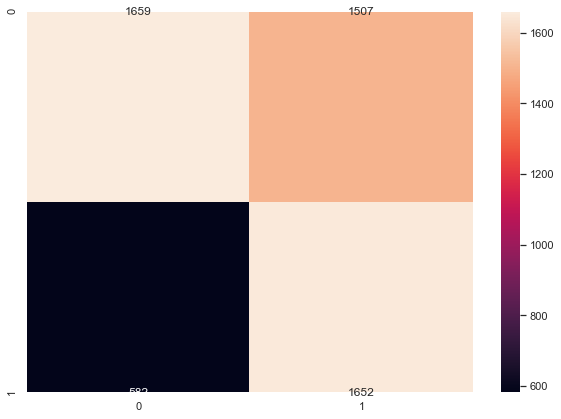

In [34]:
df_cm = pd.DataFrame(cm, index = (0,1), columns = (0,1))
plt.figure(figsize = (10,7))
sn.set (font_scale = 1.0)
sn.heatmap(df_cm, annot = True, fmt = 'g')
print('Test Data Accuracy: %0.4f' % accuracy_score(y_test, y_pred))

## Applying k-fold Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                            X = X_train,
                            y = y_train,
                            cv = 10)

c:\users\tobi\pycharmprojects\data_visualization\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\tobi\pycharmprojects\data_visualization\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\tobi\pycharmprojects\data_visualization\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\tobi\pycharmprojects\data_visualization\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\tobi\pycharmprojects\data_visualization\venv\lib\si

In [36]:
# Analyzing Coefficients

pd.concat([pd.DataFrame(X_train.columns, columns = ['featues']),
         pd.DataFrame(np.transpose(classifier.coef_), columns = ['coef'])],
                      axis = 1)

,featues,coef
0,age,-0.164577
1,deposits,0.205158
2,withdrawal,0.043113
3,purchases_partners,-0.736656
4,purchases,-0.353136
5,cc_taken,0.088509
6,cc_recommended,0.120935
7,cc_disliked,-0.003490
8,cc_liked,-0.005519
9,cc_application_begin,0.007141


## Feature Selection

This will shorten the number of columns we need to get the same accuracy we have. 

With less columns the model will be faster and this is also useful because whenever we want to put model to production we want to make sure it is not to heavy to run.

In [37]:
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression

# Model to Test

classifier = LogisticRegression()
rfe = RFE(classifier, 20) # Selecting 20 fields that were the best predictor

rfe = rfe.fit(X_train, y_train)

c:\users\tobi\pycharmprojects\data_visualization\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\tobi\pycharmprojects\data_visualization\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\tobi\pycharmprojects\data_visualization\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\tobi\pycharmprojects\data_visualization\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\tobi\pycharmprojects\data_visualization\venv\lib\si

In [38]:
# summarize the selection of the attributes

print(rfe.support_)

[ True  True  True  True  True  True  True False False False  True  True
  True False  True False  True  True  True False  True  True False  True
  True False False False  True False False False False  True False False
 False False False False False]


In [39]:
X_train.columns[rfe.support_] # This are the mcolumns that were included

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'app_downloaded', 'web_user', 'ios_user',
       'registered_phones', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_one_month', 'reward_rate', 'housing_O', 'housing_R',
       'payment_type_Weekly', 'zodiac_sign_Gemini'],
      dtype='object')

These 20 columns are the actual ones that contributes to the churn rate we're trying to predict.

In [40]:
rfe.ranking_ # To see the ranking of the fields

array([ 1,  1,  1,  1,  1,  1,  1, 18, 17, 16,  1,  1,  1, 10,  1,  5,  1,
        1,  1,  3,  1,  1, 19,  1,  1,  2, 20,  7,  1, 13, 11, 12,  6,  1,
       15, 14,  4, 22,  9, 21,  8])

We will now use the highly ranked fields to fit the model

In [41]:
classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

c:\users\tobi\pycharmprojects\data_visualization\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Test Data Accuracy: 0.6091


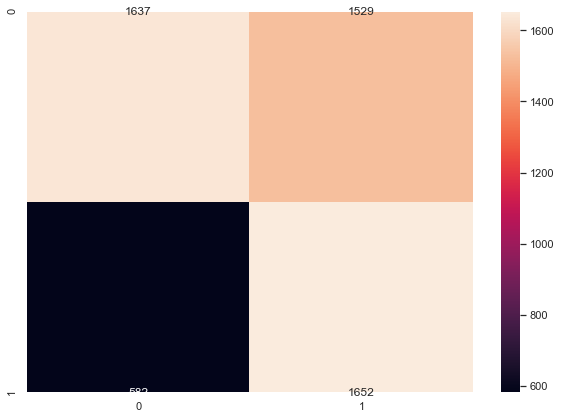

In [42]:
# Predicting Test Set

y_pred = classifier.predict(X_test[X_test.columns[rfe.support_]])


# Evaluating Results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)

accuracy_score(y_test, y_pred)

precision_score(y_test, y_pred) #of all the positives predicted, how may of them are actually true

recall_score(y_test, y_pred)

f1_score(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = (0,1), columns = (0,1))
plt.figure(figsize = (10,7))
sn.set (font_scale = 1.0)
sn.heatmap(df_cm, annot = True, fmt = 'g')
print('Test Data Accuracy: %0.4f' % accuracy_score(y_test, y_pred))

In [43]:
# Analyzing Coefficients

pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns = ['features']),
          pd.DataFrame(np.transpose(classifier.coef_), columns = ['coef'])],
         axis = 1)

,features,coef
0,age,-0.159545
1,deposits,0.212642
2,withdrawal,0.046170
3,purchases_partners,-0.728734
4,purchases,-0.359481
5,cc_taken,0.087514
6,cc_recommended,0.126826
7,app_downloaded,-0.046170
8,web_user,0.124483
9,ios_user,0.076252


## End of Model

In [44]:
# Formatting Final Results

final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()

final_results['predicited_churn'] = y_pred

final_results = final_results[['user', 'churn', 'predicited_churn']].reset_index(drop = True)

In [45]:
final_results

,user,churn,predicited_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
5,28827,0.0,0
6,58305,1.0,0
7,2351,0.0,1
8,11790,0.0,1
9,46727,0.0,0
